In [1]:
!nvidia-smi

Failed to initialize NVML: Driver/library version mismatch


In [2]:
# check torch setup
import torch
torch.cuda.is_available()

True

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
from lensless.io import load_psf
from lensless.plot import plot_image, pixel_histogram
import numpy as np

# Visualize PSFs

In [3]:
downsample = 1
bg_pix = None      # turn off removing background pixel, which is estimated from top-left corner
nbits = 12         # RPi camera is 12 bits

dimensions : (3040, 4056, 3)
data type : uint16
max  : 4095
min  : 0
mean : 1.9224569567718606


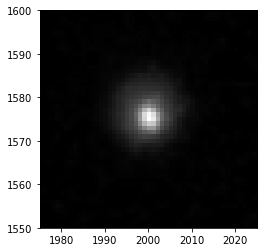

In [132]:
fp = "../psfs/lens.png"
gamma = 2.2
single_psf = True     # use same PSF per channel

zoom_x = [1975, 2025]
zoom_y = [1550, 1600]

psf = load_psf(fp=fp, verbose=True, downsample=downsample, single_psf=single_psf, return_float=False, bg_pix=bg_pix)
ax = plot_image(psf, gamma=gamma, normalize=True)
ax.set_xlim(zoom_x);
ax.set_ylim(zoom_y);
if not single_psf:
    pixel_histogram(psf, nbits=nbits);

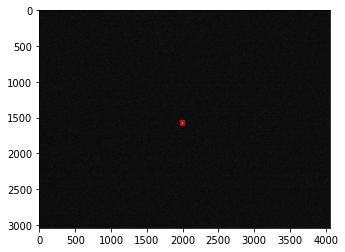

In [133]:
ax = plot_image(psf, gamma=25, normalize=True)

zoom_color = "r"
ax.axvline(
    x=zoom_x[0], c=zoom_color, ymin=1 - zoom_y[0]/3040, ymax=1 - zoom_y[1]/3040
)
ax.axvline(
    x=zoom_x[1], c=zoom_color, ymin=1 - zoom_y[0]/3040, ymax=1 - zoom_y[1]/3040
)
ax.axhline(
    y=zoom_y[0], c=zoom_color, xmin=zoom_x[0]/4056, xmax=zoom_x[1]/4056
)
ax.axhline(
    y=zoom_y[1], c=zoom_color, xmin=zoom_x[0]/4056, xmax=zoom_x[1]/4056
)

dimensions : (3040, 4056, 3)
data type : uint16
max  : 4094
min  : 0
mean : 84.57678515043773


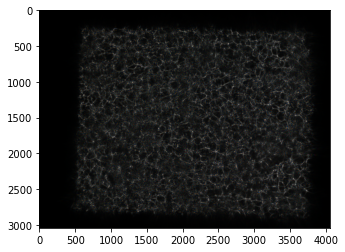

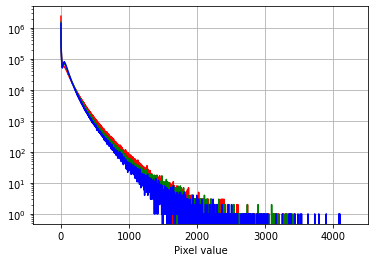

In [5]:
fp = "../psfs/tape.png"
gamma = 2.2
single_psf = False     # use same PSF per channel

tape_psf = load_psf(fp=fp, verbose=True, downsample=downsample, single_psf=single_psf, return_float=False, bg_pix=bg_pix)
plot_image(tape_psf, gamma=gamma, normalize=True)
pixel_histogram(tape_psf, nbits=nbits);

<AxesSubplot:>

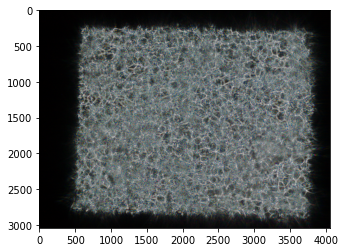

In [6]:
plot_image(tape_psf, gamma=6, normalize=True)

dimensions : (3040, 4056, 3)
data type : uint16
max  : 4095
min  : 0
mean : 105.11123752119451


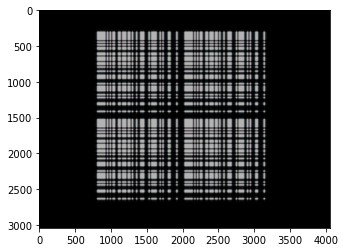

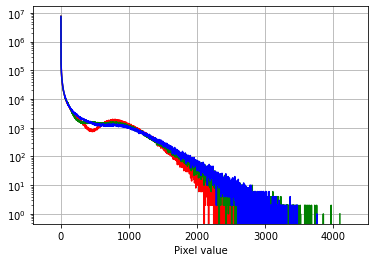

In [4]:
fp = "../psfs/simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit.png"
gamma = 5
single_psf = False     # use same PSF per channel

slm_psf = load_psf(fp=fp, verbose=True, downsample=downsample, single_psf=single_psf, return_float=False, bg_pix=bg_pix)
plot_image(slm_psf, gamma=gamma, normalize=True)
pixel_histogram(slm_psf, nbits=nbits);

dimensions : (3040, 4056, 3)
data type : uint16
max  : 4095
min  : 0
mean : 6.764968348818298


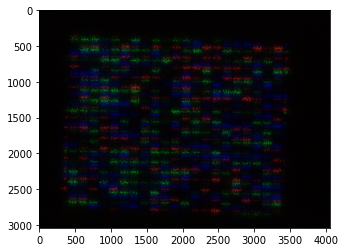

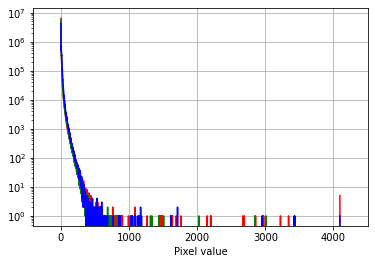

In [7]:
fp = "../psfs/adafruit.png"
gamma = 5
single_psf = False     # use same PSF per channel

slm_psf = load_psf(fp=fp, verbose=True, downsample=downsample, single_psf=single_psf, return_float=False, bg_pix=bg_pix)
plot_image(slm_psf, gamma=gamma, normalize=True)
pixel_histogram(slm_psf, nbits=nbits);

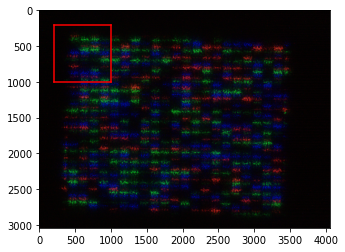

In [8]:
ax = plot_image(slm_psf, gamma=8, normalize=True)

zoom_color = "r"
zoom_x = [200, 1000]
zoom_y = [200, 1000]


ax.axvline(
    x=zoom_x[0], c=zoom_color, ymin=1 - zoom_y[0]/3040, ymax=1 - zoom_y[1]/3040
)
ax.axvline(
    x=zoom_x[1], c=zoom_color, ymin=1 - zoom_y[0]/3040, ymax=1 - zoom_y[1]/3040
)
ax.axhline(
    y=zoom_y[0], c=zoom_color, xmin=zoom_x[0]/4056, xmax=zoom_x[1]/4056
)
ax.axhline(
    y=zoom_y[1], c=zoom_color, xmin=zoom_x[0]/4056, xmax=zoom_x[1]/4056
)

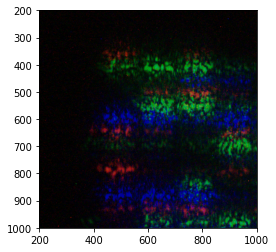

In [9]:
ax = plot_image(slm_psf, gamma=8, normalize=True)
ax.set_xlim([200, 1000])
ax.set_ylim([200, 1000])
plt.gca().invert_yaxis();

In [10]:
from waveprop.devices import SLMOptions, SensorOptions, slm_dict, sensor_dict, SensorParam

slm_dict["adafruit"]
slm_dict["adafruit"]["cell_dim"] / slm_dict["adafruit"]["pitch"]

array([0.82159457, 0.82099828])

dimensions : (3040, 4056, 3)
data type : uint16
max  : 4095
min  : 0
mean : 71.21211809340289


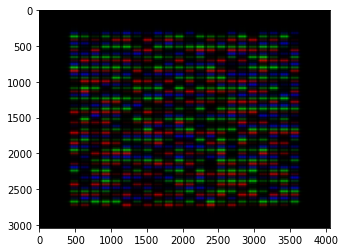

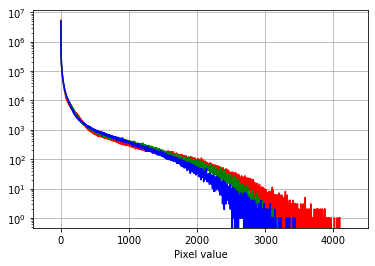

In [14]:
fp = "../psfs/simulated_adafruit_deadspaceTrue_15052022_21h04.png"
gamma = 2.2
single_psf = False     # use same PSF per channel

psf = load_psf(fp=fp, verbose=True, downsample=downsample, single_psf=single_psf, return_float=False, bg_pix=bg_pix)
plot_image(psf, gamma=gamma, normalize=True)
pixel_histogram(psf, nbits=nbits);

dimensions : (3040, 4056, 3)
data type : uint16
max  : 4095
min  : 0
mean : 111.87186802527769


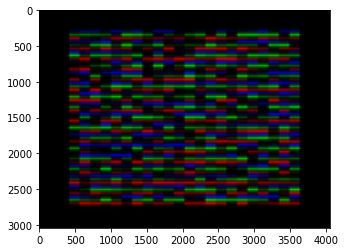

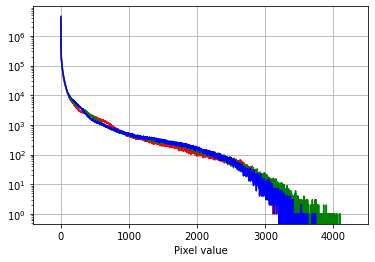

In [16]:
fp = "../psfs/simulated_adafruit_deadspaceFalse_15052022_21h44.png"
gamma = 2.2
single_psf = False     # use same PSF per channel

psf = load_psf(fp=fp, verbose=True, downsample=downsample, single_psf=single_psf, return_float=False, bg_pix=bg_pix)
plot_image(psf, gamma=gamma, normalize=True)
pixel_histogram(psf, nbits=nbits);

dimensions : (760, 1014, 3)
data type : uint16
max  : 500
min  : 0
mean : 8.385676407488148


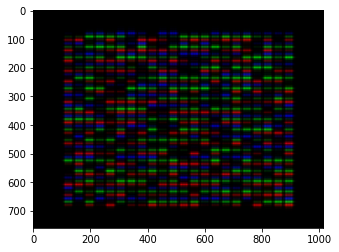

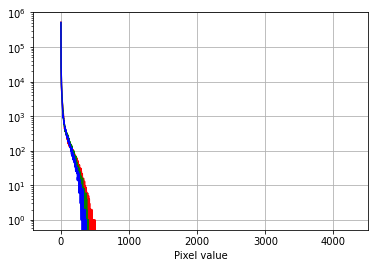

In [11]:
# fp = "../psfs/simulated_adafruit.png"
fp = "../psfs/simulated_adafruit_crop0.8_down4_11042022_10h01.png"
gamma = 2.2
single_psf = False     # use same PSF per channel

psf = load_psf(fp=fp, verbose=True, downsample=downsample, single_psf=single_psf, return_float=False, bg_pix=bg_pix)
plot_image(psf, gamma=gamma, normalize=True)
pixel_histogram(psf, nbits=nbits);

dimensions : (3040, 4056, 3)
data type : uint16
max  : 750
min  : 0
mean : 1.5163894890394132


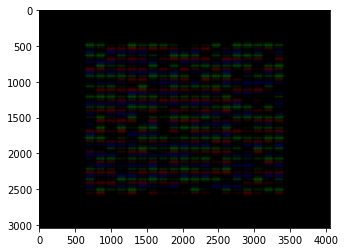

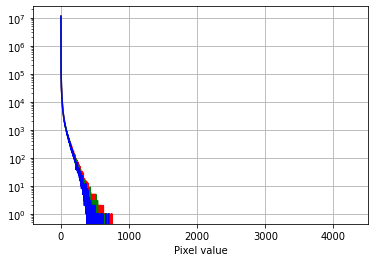

In [8]:
fp = "../psfs/simulated_adafruit_noise.png"
gamma = 4
single_psf = False     # use same PSF per channel

psf = load_psf(fp=fp, verbose=True, downsample=downsample, single_psf=single_psf, return_float=False, bg_pix=bg_pix)
plot_image(psf, gamma=gamma, normalize=True)
pixel_histogram(psf, nbits=nbits);

# Visualizing learned SLM pattern

In [344]:
import pathlib as plib
import json
from pprint import pprint
import torchvision.datasets as dset
import torchvision.transforms as transforms
from lenslessclass.models import MultiClassLogistic, SLMMultiClassLogistic
from lenslessclass.datasets import MNISTAugmented
import torch
import torch.nn as nn
from waveprop.devices import SLMOptions, SensorOptions, slm_dict, sensor_dict, SensorParam
from lensless.plot import plot_image, pixel_histogram
import numpy as np


train = False
return_measurement = True     # when appluing forward of model
# model_dir = plib.Path("../MNIST_no_psf_down8_outdim768_100epoch_seed1_logistic_reg_poisson40.0_06052022_00h23")
# model_dir = plib.Path("../models/MNIST_no_psf_down8_outdim192_100epoch_seed0_logistic_reg_speckle40.0_03052022_12h20")
# model_dir = plib.Path("../MNIST_no_psf_down8_outdim48_100epoch_seed0_logistic_reg_speckle40.0_04052022_15h04")


# Single hidden, 768
model_dir = plib.Path("../MNIST_no_psf_down8_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_11052022_08h41")

# # Single hidden, 192
# model_dir = plib.Path("../MNIST_no_psf_down8_outdim192_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_11052022_19h27")

# Single hidden, 48
model_dir = plib.Path("../MNIST_no_psf_down8_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_11052022_19h24")

# # Single hidden, 12
# model_dir = plib.Path("../MNIST_no_psf_down8_outdim12_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_12052022_12h21")

# ---

# # Logistic, 768
# model_dir = plib.Path("../MNIST_no_psf_down8_outdim768_72epoch_seed1_logistic_reg_poisson40.0_DSresize_09052022_17h39")

# # # Logistic, 192
# # model_dir = plib.Path("../MNIST_no_psf_down8_outdim192_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_DSresize_10052022_09h11")

# # Logistic, 48
# model_dir = plib.Path("../MNIST_no_psf_down8_outdim48_100epoch_seed0_logistic_reg_speckle40.0_04052022_15h04")
 
# # Logistic, 12
# model_dir = plib.Path("../MNIST_no_psf_down8_outdim12_50epoch_seed0_SLMMultiClassLogistic_poisson40.0_DSresize_12052022_21h03")


# -- transformatsionns (768)

# -shift
model_dir = plib.Path("../MNIST_no_psf_down8_height0.12_RandomShift_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_13052022_13h54")

# rescale
model_dir = plib.Path("../MNIST_no_psf_down8_height0.02-0.2_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_18052022_23h33")


# rotate 
model_dir = plib.Path("../MNIST_no_psf_down8_height0.12_RandomRotate90.0_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_17052022_08h39")

# perspective
model_dir = plib.Path("../MNIST_no_psf_down8_height0.12_RandomPerspective0.5_outdim768_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_18052022_14h34")


# - transformations (48)
# # shift
# model_dir = plib.Path("../MNIST_no_psf_down8_height0.12_RandomShift_outdim48_5epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_14052022_21h09")

# # rescale
# model_dir = plib.Path("../MNIST_no_psf_down8_height0.02-0.2_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_14052022_14h58")

# # rotate
# model_dir = plib.Path("../MNIST_no_psf_down8_height0.12_RandomRotate90.0_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_14052022_22h29")

# # perspective
# model_dir = plib.Path("../MNIST_no_psf_down8_height0.12_RandomPerspective0.5_outdim48_50epoch_seed0_SLMSingleHidden800_poisson40.0_DSresize_15052022_01h26")


# Opening JSON file
f = open(str(model_dir / "metadata.json"))
metadata = json.load(f)
pprint(metadata)

{'batch_size': 200,
 'best_test_acc': 0.8371999859809875,
 'best_test_acc_epoch': 49,
 'dataset': '/home/bezzam/LenslessClassification/data/MNIST_no_psf_down8_height0.12_RandomPerspective0.5',
 'down_orig': 1.0,
 'mean': 0.0034453331027179956,
 'min_val': -0.0673261284828186,
 'model': 'SLMSingleHidden800',
 'model_param': {'crop_fact': 0.8,
                 'deadspace': True,
                 'device': 'cuda:1',
                 'device_mask_creation': 'cpu',
                 'down': 'resize',
                 'dropout': None,
                 'hidden': 800,
                 'hidden2': None,
                 'input_shape': [380, 507],
                 'mask2sensor': 0.004,
                 'multi_gpu': False,
                 'scene2mask': 0.4,
                 'target_dim': [28, 28]},
 'noise_type': 'poisson',
 'random_shift': False,
 'seed': 0,
 'sensor': 'rpi_hq',
 'sensor_activation': 'relu',
 'slm': 'adafruit',
 'snr': 40.0,
 'std': 0.05117378756403923}


In [345]:
# metadata["dataset"] = "../data/MNIST_no_psf_down8_height0.12"

# load test set
if metadata["dataset"]:
    trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(metadata["mean"], metadata["std"])])
    test_set = MNISTAugmented(path=metadata["dataset"], train=train, transform=trans)

    # hybrid
    trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
    test_set = MNISTAugmented(path=metadata["dataset"], train=train, transform=trans)   

else:
    root = "../data"
    trans = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((metadata["mean"],), (metadata["std"],))]
    )
    test_set = dset.MNIST(root=root, train=train, transform=trans, download=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_set, batch_size=metadata["batch_size"], shuffle=False
)

In [346]:
# create model instance
use_cuda = torch.cuda.is_available()
if use_cuda:
    print("CUDA available, using GPU.")
    device = "cuda"
else:
    device = "cpu"
    print("CUDA not available, using CPU.")

if metadata["model"] == "SLMMultiClassLogistic" or "SLMSingleHidden" in metadata["model"]:
    sensor_act_fn = None
    sensor_act = metadata["sensor_activation"]
    if sensor_act is not None:
        if sensor_act == "relu":
            sensor_act_fn = nn.ReLU()
        elif sensor_act == "leaky":
            sensor_act_fn = nn.LeakyReLU(float=0.1)
        elif sensor_act == "tanh":
            sensor_act_fn = nn.Tanh()
        else:
            raise ValueError("Not supported activation.")

    metadata["model_param"].update(
        {
            "slm_config": slm_dict[metadata["slm"]],
            "sensor_config": sensor_dict[metadata["sensor"]],
            "sensor_activation": sensor_act_fn,
            "n_class": 10,
            "return_measurement": return_measurement,
            "multi_gpu": [0, 1] if metadata["model_param"]["multi_gpu"] else False
        }
    )
    model = SLMMultiClassLogistic(**metadata["model_param"])
elif metadata["model"] == "MultiClassLogistic":
    model = MultiClassLogistic(**metadata["model_param"])
else:
    raise ValueError("Unsupported model.")

if use_cuda:
    model = model.to(device)

# -- load from state dict
state_dict_fp = str(model_dir / "state_dict.pth")
model.load_state_dict(torch.load(state_dict_fp))

if metadata["model"] == "SLMMultiClassLogistic" or "SLMSingleHidden" in metadata["model"]:
    # recompute PSF for loaded SLM values
    model.compute_intensity_psf()

print("\nModel's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

CUDA available, using GPU.

Model's state_dict:
slm_vals 	 torch.Size([51, 22])
conv_bn.weight 	 torch.Size([1])
conv_bn.bias 	 torch.Size([1])
conv_bn.running_mean 	 torch.Size([1])
conv_bn.running_var 	 torch.Size([1])
conv_bn.num_batches_tracked 	 torch.Size([])
linear1.weight 	 torch.Size([800, 768])
bn.weight 	 torch.Size([800])
bn.bias 	 torch.Size([800])
bn.running_mean 	 torch.Size([800])
bn.running_var 	 torch.Size([800])
bn.num_batches_tracked 	 torch.Size([])
linear2.weight 	 torch.Size([10, 800])
linear2.bias 	 torch.Size([10])


In [347]:
slm_weights = model.slm_vals.clone()
print("Minimum :", slm_weights.min())
print("Maximum :", slm_weights.max())
print("Shape :", slm_weights.shape)

Minimum : tensor(0., device='cuda:0', grad_fn=<MinBackward1>)
Maximum : tensor(1., device='cuda:0', grad_fn=<MaxBackward1>)
Shape : torch.Size([51, 22])


(380, 507, 3)


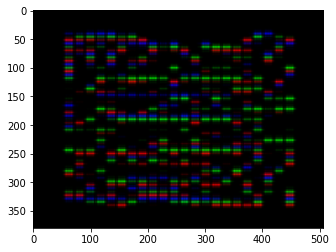

In [348]:
model.grayscale = False

# -- plot corresponding PSF
model.compute_intensity_psf()
learned_psf = model._psf.cpu().detach().numpy().squeeze()
if not model.grayscale:
    learned_psf = learned_psf.transpose(1, 2, 0)
# learned_psf = model.psf(numpy=True)

gamma = 2.2
print(learned_psf.shape)
plot_image(learned_psf, gamma=gamma, normalize=True);

(51, 22)


<AxesSubplot:xlabel='Pixel value'>

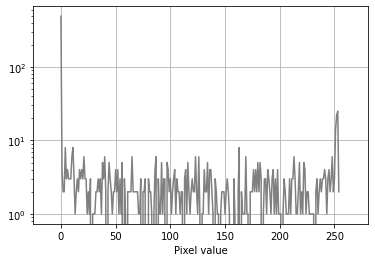

In [349]:
# historgram of SLM values

slm_weights_np = model.slm_vals.clone().detach().cpu().numpy()
print(slm_weights_np.shape)
pixel_histogram((slm_weights_np * 255).astype(int), nbits=8)

torch.Size([1, 1, 380, 507])


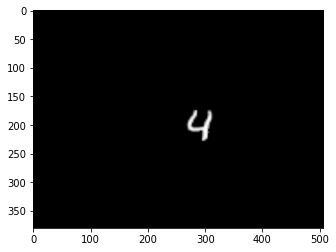

In [391]:
# simulate / propagate an example image
dataset_idx = 4

# -- get from dataset
data = test_set[dataset_idx][0].unsqueeze(0)
print(data.shape)

data_cpu = data.cpu().detach().numpy().squeeze()
data_cpu -= data_cpu.min()

# # -- simulate
# object_height = 0.12
# perspective = False
# random_shift = False
# rotate = False    # 90 or False

# down_psf = 8
# single_psf = False
# mask2sensor = 0.004

# noise_type = "poisson"
# snr = 40

# grayscale = True
# scene2mask = 40e-2
# device = "cpu"

# output_dim = (np.array([3040, 4056]) * 1 / down_psf).astype(int)
# output_dim = np.array(output_dim).tolist()

# ds = MNISTPropagated(
#     output_dim=output_dim,
#     downsample_psf=down_psf,
#     scene2mask=scene2mask,
#     mask2sensor=mask2sensor,
#     sensor="rpi_hq",
#     object_height=object_height,
#     device=device,
#     grayscale=grayscale,
#     vflip=False,
#     train=False,
#     root="../data",
#     noise_type=noise_type,
#     snr=snr,
#     random_shift=random_shift,
#     rotate=rotate,
#     perspective=perspective,
# )
# data, label = ds[dataset_idx]
# if grayscale:
#     data_cpu = data.cpu().clone().numpy().squeeze()
# else:
#     data_cpu = data.cpu().clone().numpy().transpose(1, 2, 0)
# print(data_cpu.shape)
# print(label)

# -- plot
gamma = 2.2
plot_image(data_cpu, gamma=gamma, normalize=True);

In [392]:
# return_measurement = True
model.grayscale = True
model.compute_intensity_psf()
measurement = model(data.to(device=model.device))
print(measurement.shape)

torch.Size([1, 1, 24, 32])


In [393]:
measurement.min()

tensor(0., device='cuda:1', grad_fn=<MinBackward1>)

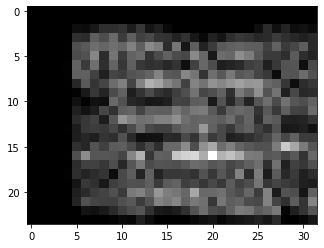

In [394]:

meas_cpu = measurement.cpu().detach().numpy().squeeze()
if not model.grayscale:
    meas_cpu = meas_cpu.transpose(1, 2, 0)
meas_cpu -= meas_cpu.min()

meas_cpu = meas_cpu / meas_cpu.max()
meas_cpu = (meas_cpu * 255).astype(np.uint8)
# print(meas_cpu)

gamma = 1
# plot_image(meas_cpu, gamma=gamma, normalize=True);
ax = plot_image(meas_cpu, gamma=gamma, normalize=True);

# style = dict(size=10, color='red', ha="center")
# for i in range(meas_cpu.shape[0]):
#     for j in range(meas_cpu.shape[1]):
#         ax.text(j, i, meas_cpu[i, j], **style)

In [395]:
learned_psf.shape

(380, 507, 3)

In [396]:
# prepare data
# learned_psf.shape
from lensless.util import resize, rgb2gray
import cv2

# subtract background, assume black edges
bg_pix=(5, 25)
bg = np.zeros(3)
if bg_pix is not None:
    bg = []
    for i in range(3):
        bg_i = np.mean(learned_psf[bg_pix[0] : bg_pix[1], bg_pix[0] : bg_pix[1], i])
        learned_psf[:, :, i] -= bg_i
        bg.append(bg_i)
    learned_psf = np.clip(learned_psf, a_min=0, a_max=psf.max())
    bg = np.array(bg)

# resize
psf = resize(learned_psf, shape=meas_cpu.shape, interpolation=cv2.INTER_CUBIC).astype(np.float32)
psf /= np.linalg.norm(psf.ravel())
psf = rgb2gray(psf)


print(psf.shape)
print(psf.max())


meas_cpu = measurement.cpu().detach().numpy().squeeze()
meas_cpu -= meas_cpu.min()
meas_cpu /= meas_cpu.max()

print(meas_cpu.shape)
print(meas_cpu.max())

(24, 32)
0.152075819474092
(24, 32)
1.0


In [397]:
# def identity(x):
#     return x

# def psi_gram(shape):
#     gram = np.eye(N=shape[0], M=shape[1])[:, :, np.newaxis]
#     return np.fft.rfft2(gram, axes=(0, 1))

# recon = ADMM(psf, psi=identity, psi_adj=identity, psi_gram=psi_gram)

Setup time : 0.00293731689453125 s
Processing time : 0.07440614700317383 s


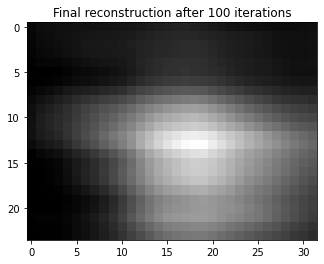

In [398]:
# try recovery
from lensless.io import load_psf
from lensless.util import rgb2gray
import time
from lensless import ADMM


n_iter = 100
disp = n_iter + 1
gamma = 1

# define and apply ADMM with identity prior
start_time = time.time()

recon = ADMM(psf)   # finite difference
# def identity(x):
#     return x
# def psi_gram(shape):
#     gram = np.eye(N=shape[0], M=shape[1])[:, :, np.newaxis]
#     return np.fft.rfft2(gram, axes=(0, 1))
# recon = ADMM(psf, psi=identity, psi_adj=identity, psi_gram=psi_gram)

# set data
recon.set_data(meas_cpu)
print(f"Setup time : {time.time() - start_time} s")

start_time = time.time()
res = recon.apply(n_iter=n_iter, disp_iter=disp, gamma=gamma, plot=True)
print(f"Processing time : {time.time() - start_time} s")

In [14]:
from lenslessclass.models import SLMMultiClassLogistic
from lenslessclass.datasets import MNISTAugmented
import torch.nn as nn
from waveprop.devices import SLMOptions, SensorOptions, slm_dict, sensor_dict, SensorParam
from lensless.plot import plot_image, pixel_histogram

path = "../MNIST_no_psf_down8_logistic_reg_adam_relu_0p8crop_batch200_100epoch.pth"
path = "../April11_MNIST_no_psf_down8_logistic_reg_clamp.pth"

# model parameters, SHOULD SAVE THIS!
device = "cpu"
crop_fact = 0.8
deadspace = True
scene2mask = 0.4
mask2sensor = 0.004
sensor_act = nn.ReLU()
down_out = 128
sensor = SensorOptions.RPI_HQ.value
slm = SLMOptions.ADAFRUIT.value
augmented_dataset = "../data/MNIST_no_psf_down8"

# need this for loading correctly since we train with DataParallel!! 
# -- https://discuss.pytorch.org/t/solved-keyerror-unexpected-key-module-encoder-embedding-weight-in-state-dict/1686
# -- or could use this solution: https://discuss.pytorch.org/t/solved-keyerror-unexpected-key-module-encoder-embedding-weight-in-state-dict/1686/4
multi_gpu = [0, 1]      

# derived param
train_set = MNISTAugmented(path=augmented_dataset, train=True)
input_shape = train_set.output_dim
sensor_param = sensor_dict[sensor]
if down_out:
    output_dim = tuple((sensor_param[SensorParam.SHAPE] * 1 / down_out).astype(int))


model = SLMMultiClassLogistic(
    input_shape=input_shape,
    slm_config=slm_dict[slm],
    sensor_config=sensor_param,
    crop_fact=crop_fact,
    device=device,
    deadspace=deadspace,
    scene2mask=scene2mask,
    mask2sensor=mask2sensor,
    device_mask_creation="cpu",  # TODO: bc doesn't fit on GPU
    target_dim=output_dim,
    sensor_activation=sensor_act,
    multi_gpu=multi_gpu,
    n_class=10
)
model.load_state_dict(torch.load(path))

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

RuntimeError: Error(s) in loading state_dict for SLMMultiClassLogistic:
	size mismatch for linear1.module.weight: copying a param with shape torch.Size([10, 713]) from checkpoint, the shape in current model is torch.Size([10, 690]).

In [17]:
input_shape

array([380, 507])

In [6]:
from lenslessclass.models import SLMMultiClassLogistic
from lenslessclass.datasets import MNISTAugmented
import torch.nn as nn
from waveprop.devices import SLMOptions, SensorOptions, slm_dict, sensor_dict, SensorParam
from lensless.plot import plot_image, pixel_histogram

path = "../MNIST_no_psf_down8_logistic_reg_adam_relu_0p8crop_batch200_100epoch.pth"
path = "../April11_MNIST_no_psf_down8_logistic_reg_clamp.pth"

# model parameters, SHOULD SAVE THIS!
device = "cpu"
crop_fact = 0.8
deadspace = True
scene2mask = 0.4
mask2sensor = 0.004
sensor_act = nn.ReLU()
down_out = 128
sensor = SensorOptions.RPI_HQ.value
slm = SLMOptions.ADAFRUIT.value
augmented_dataset = "../data/MNIST_no_psf_down8"

# need this for loading correctly since we train with DataParallel!! 
# -- https://discuss.pytorch.org/t/solved-keyerror-unexpected-key-module-encoder-embedding-weight-in-state-dict/1686
# -- or could use this solution: https://discuss.pytorch.org/t/solved-keyerror-unexpected-key-module-encoder-embedding-weight-in-state-dict/1686/4
multi_gpu = False    

# derived param
train_set = MNISTAugmented(path=augmented_dataset, train=True)
input_shape = train_set.output_dim
sensor_param = sensor_dict[sensor]
if down_out:
    output_dim = tuple((sensor_param[SensorParam.SHAPE] * 1 / down_out).astype(int))


model = SLMMultiClassLogistic(
    input_shape=input_shape,
    slm_config=slm_dict[slm],
    sensor_config=sensor_param,
    crop_fact=crop_fact,
    device=device,
    deadspace=deadspace,
    scene2mask=scene2mask,
    mask2sensor=mask2sensor,
    device_mask_creation="cpu",  # TODO: bc doesn't fit on GPU
    output_dim=output_dim,
    sensor_activation=sensor_act,
    multi_gpu=multi_gpu,
)
model.load_state_dict(torch.load(path))

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

NameError: name 'torch' is not defined

In [4]:
slm_weights = model.slm_vals.clone()
print("Minimum :", slm_weights.min())
print("Maximum :", slm_weights.max())
print("Shape :", slm_weights.shape)

Minimum : tensor(0., grad_fn=<MinBackward1>)
Maximum : tensor(1., grad_fn=<MaxBackward1>)
Shape : torch.Size([51, 22])


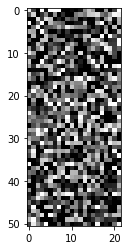

In [13]:
import matplotlib.pyplot as plt

plt.imshow(slm_weights.detach().numpy(), cmap="gray")

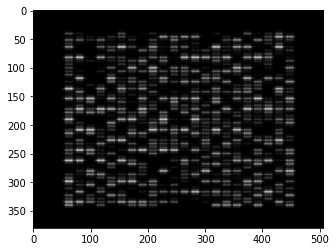

In [5]:
# -- plot corresponding PSF
model.compute_intensity_psf()
learned_psf = model._psf.cpu().detach().numpy().squeeze()
# learned_psf = model.psf(numpy=True)

gamma = 2.2
plot_image(learned_psf, gamma=gamma, normalize=True);

In [ ]:
## -- LOADING WITHOUT MULTIGPU: https://discuss.pytorch.org/t/solved-keyerror-unexpected-key-module-encoder-embedding-weight-in-state-dict/1686/4

# original saved file with DataParallel
state_dict = torch.load('myfile.pth.tar')
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)

# Measured data

dimensions : (480, 640, 3)
data type : uint8
max  : 108
min  : 0
mean : 1.3989811197916666


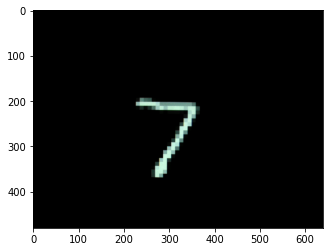

In [16]:
from lensless.io import load_image, plot_image


gamma = 1

lensed_fp = "/home/bezzam//MNIST_lensed/test/img0.png"

data = load_image(lensed_fp, verbose=True)
plot_image(data, gamma=gamma, normalize=True);

#### tape

Setup time : 0.1982123851776123 s
Processing time : 3.8373687267303467 s


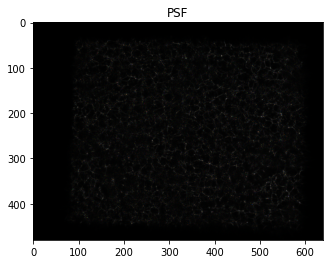

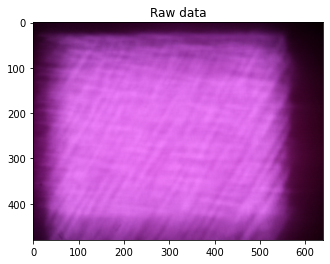

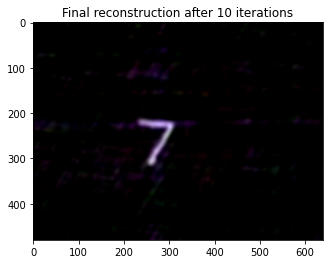

In [11]:
import time
from lensless.io import load_data
from lensless import ADMM

psf_fp = "/home/bezzam/LenslessPiCam/data/psf/tape_rgb.png"
data_fp = "/home/bezzam//MNIST_tape/test/img0.png"
n_iter = 10
disp = 20
gamma = 1


psf, data = load_data(
    psf_fp=psf_fp,
    data_fp=data_fp,
    shape=(480, 640),
    downsample=None,
    gamma=gamma
)

start_time = time.time()
recon = ADMM(psf)
recon.set_data(data)
print(f"Setup time : {time.time() - start_time} s")

start_time = time.time()
res = recon.apply(n_iter=n_iter, disp_iter=disp, gamma=gamma, plot=True)
print(f"Processing time : {time.time() - start_time} s")

# MNIST

In [5]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
mnist_original = datasets.MNIST(
    root='../data', train=False, download=True, transform=trans
)

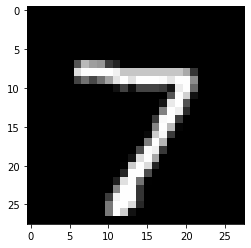

In [7]:
img, label = mnist_original[0] 
plot_image(img.numpy().squeeze(), gamma=gamma, normalize=True);

# Simulate (on the fly)

In [32]:
# determine output dimension to keep similar number of pixels as 
# original MNIST and same aspect ratio
# 28 * 28 = 784
# h * w = 784    s.t. w/h = 3040/4056
# -> w * (4056/3040*w) = 784
# -> w = sqrt(768  * 3040 / 4056)

import numpy as np

down_fact = 1

w = int(np.sqrt(784 / down_fact * 3040 / 4056))
h = int(4056/3040*w)
output_dim_mnist = (w, h)
print(output_dim_mnist)
print(w * h)

(24, 32)
768


In [34]:
down_out = 100

np.array([3040, 4056]) / down_out

array([30.4 , 40.56])

In [8]:
down_orig = 1
target_dim = np.array([28, 28])
w = int(np.round(np.sqrt(np.prod(target_dim) / down_orig)))
print(w, w)
print(w * w)

28 28
784


In [2]:
import numpy as np

down_orig = 1
target_dim = np.array([28, 28])

w = np.sqrt(np.prod(target_dim) / down_fact * 3040 / 4056)
h = 4056/3040*w
w = int(np.round(w))
h = int(np.round(h))
output_dim_mnist = (w, h)
print(output_dim_mnist)
print(w * h)

NameError: name 'down_fact' is not defined

### lens

(100, 100)


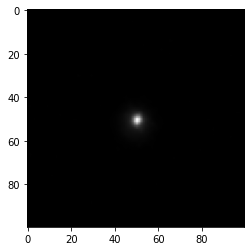

In [186]:
from lenslessclass.datasets import MNISTPropagated
import numpy as np
from lensless.plot import plot_image


psf_fp = "../psfs/lens.png"
noise_type = "poisson"
# noise_type = None
snr = 40
mask2sensor = 7.53e-3
crop_psf = 100
output_dim = (24, 32)
output_dim = (760, 1014)
# output_dim = output_dim_mnist
down_psf = 1    # HAS NOT IMPACT
object_height = 0.12
grayscale = True
single_psf = True
scene2mask = 40e-2
device = "cuda:1"
sensor = "rpi_hq"


ds = MNISTPropagated(
    psf_fp=psf_fp,
    sensor=sensor,
    downsample_psf=down_psf,
    output_dim=output_dim,
    scene2mask=scene2mask,
    mask2sensor=mask2sensor,
    object_height=object_height,
    device=device,
    crop_psf=crop_psf,
    grayscale=grayscale,
    vflip=False,
    train=False,
    single_psf=single_psf,
    root="../data",
    noise_type=noise_type,
    snr=snr
)

# plot PSF
if grayscale:
    psf_data = ds.psf.cpu().clone().numpy().squeeze()
else:
    psf_data = ds.psf.cpu().clone().numpy().transpose(1, 2, 0)
print(psf_data.shape)
ax = plot_image(psf_data);
if not crop_psf:
    ax.set_xlim([1900, 2100]);
    ax.set_ylim([1500, 1650]);

(760, 1014)


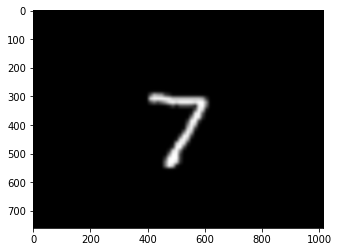

In [187]:
import matplotlib.pyplot as plt 

dataset_idx = 0

# plot simulated
img, label = ds[dataset_idx]
if grayscale:
    img_data = img.cpu().clone().numpy().squeeze()
else:
    img_data = img.cpu().clone().numpy().transpose(1, 2, 0)
print(img_data.shape)

# plt.imshow(img_data, cmap="gray");
plot_image(img_data, normalize=True);

#### reconstructing lensless

In [185]:
np.array([3040, 4056]) / np.array([6, 8])

array([506.66666667, 507.        ])

In [130]:
from lenslessclass.datasets import MNISTPropagated
import numpy as np
from lensless.plot import plot_image


psf_fp = "../psfs/tape.png"
mask2sensor = 4e-3


# # psf_fp = "../psfs/simulated_mls127_mask2sensor0p004_17052022_18h08_12bit.png"
# # psf_fp = "../psfs/simulated_mls127_mask2sensor0p0005_17052022_17h58_12bit.png"
psf_fp = "../psfs/simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit.png"
mask2sensor = 0.5e-3

psf_fp = "../psfs/adafruit.png"
mask2sensor = 4e-3

psf_fp = "../psfs/simulated_adafruit_deadspaceTrue_15052022_21h04.png"
mask2sensor = 4e-3

# psf_fp = "../psfs/simulated_mls63_mask2sensor0p004_17052022_18h01_12bit.png"
# mask2sensor = 4e-3

# output_dim = (480, 640)
output_dim = (6, 8)
# # output_dim = (48, 64)

# # # # # down = 120
# down = 4
# output_dim = tuple((np.array([3040, 4056]) / down).astype(int))

noise_type = "poisson"
snr = 40
crop_psf = False
down_psf = 8
object_height = 0.12
# object_height = 0.35
grayscale = True
single_psf = False
scene2mask = 40e-2
device = "cpu"

ds = MNISTPropagated(
    psf_fp=psf_fp,
    downsample_psf=down_psf,
    output_dim=output_dim,
    scene2mask=scene2mask,
    mask2sensor=mask2sensor,
    sensor="rpi_hq",
    object_height=object_height,
    device=device,
    crop_psf=crop_psf,
    grayscale=grayscale,
    vflip=False,
    train=False,
    single_psf=single_psf,
    root="../data",
    noise_type=noise_type,
    snr=snr,
)


(380, 507)


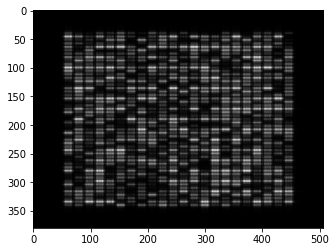

In [131]:
# plot PSF
if grayscale:
    psf_data = ds.psf.cpu().clone().numpy().squeeze()
else:
    psf_data = ds.psf.cpu().clone().numpy().transpose(1, 2, 0)
print(psf_data.shape)
ax = plot_image(psf_data, gamma=2.2, normalize=True);

(6, 8)
255


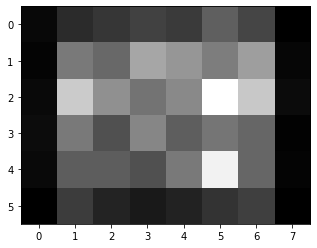

In [142]:
dataset_idx = 0

# plot simulated
img, label = ds[dataset_idx]
if grayscale:
    img_data = img.cpu().clone().numpy().squeeze()
else:
    img_data = img.cpu().clone().numpy().transpose(1, 2, 0)
print(img_data.shape)
plot_image(img_data);
print(img_data.max())

(6, 8)
Setup time : 0.0009214878082275391 s
Processing time : 0.040285587310791016 s


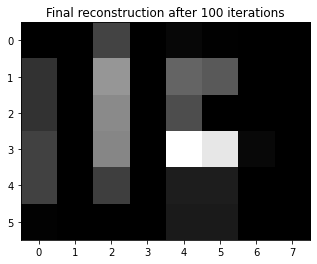

In [143]:
""" prepare data """ 
from lensless.io import load_psf
from lensless.util import rgb2gray
import time
from lensless import ADMM


psf = load_psf(fp=psf_fp, shape=img_data.shape)

if grayscale:
    psf = rgb2gray(psf)
print(psf.shape)

img_data_norm = img_data / img_data.max()

# # lensless reconstruction
# from lensless.util import resize
# import cv2

# psf = resize(psf_data, 1/ down, interpolation=cv2.INTER_CUBIC).astype(np.float32)

# print(psf.shape)

# img_data_norm = img_data / img_data.max()

n_iter = 100
disp = n_iter + 1
gamma = 1

start_time = time.time()


# def identity(x):
#     return x
# def psi_gram(shape):
#     gram = np.eye(N=shape[0], M=shape[1])[:, :, np.newaxis]
#     return np.fft.rfft2(gram, axes=(0, 1))
# recon = ADMM(psf, psi=identity, psi_adj=identity, psi_gram=psi_gram)
recon = ADMM(psf)


recon.set_data(img_data)
print(f"Setup time : {time.time() - start_time} s")

start_time = time.time()
res = recon.apply(n_iter=n_iter, disp_iter=disp, gamma=gamma, plot=True)
print(f"Processing time : {time.time() - start_time} s")

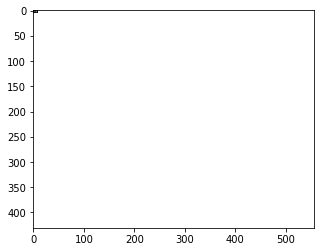

In [141]:
zoom_color = "r"
zoom_x = [480, 530]
zoom_y = [360, 410]

img_shape = res[0].shape

ax = plot_image(res[0], gamma=1, normalize=True)
ax.axvline(
    x=zoom_x[0], c=zoom_color, ymin=1 - zoom_y[0]/img_shape[0], ymax=1 - zoom_y[1]/img_shape[0]
)
ax.axvline(
    x=zoom_x[1], c=zoom_color, ymin=1 - zoom_y[0]/img_shape[0], ymax=1 - zoom_y[1]/img_shape[0]
)
ax.axhline(
    y=zoom_y[0], c=zoom_color, xmin=zoom_x[0]/img_shape[1], xmax=zoom_x[1]/img_shape[1]
)
ax.axhline(
    y=zoom_y[1], c=zoom_color, xmin=zoom_x[0]/img_shape[1], xmax=zoom_x[1]/img_shape[1]
)

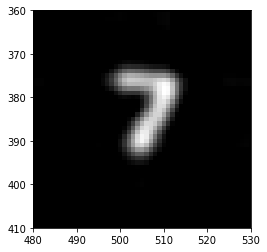

In [89]:
import matplotlib.pyplot as plt

ax = plot_image(res[0], gamma=1, normalize=True)
ax.set_xlim(zoom_x)
ax.set_ylim(zoom_y)
plt.gca().invert_yaxis();

# Simulated (from dataset)

In [ ]:
import torchvision.transforms as transforms
from lenslessclass.datasets import MNISTAugmented
import numpy as np
from lensless.plot import plot_image

dataset = "../data/MNIST_lens_down128_height0.12"
dataset = "../data/MNIST_lens_outdim768_height0.12_croppsf100"
dataset = "../data/MNIST_lens_outdim3082560_height0.12_scene2mask0.4_poisson40.0_croppsf100_10files"
dataset = "../data/MNIST_lens_outdim3082560_height0.12_scene2mask0.4_poisson40.0_croppsf100_RandomShift_10files"
dataset = "../data/MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_ORIG"
# dataset = "../data/MNIST_simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0"
# dataset = "../data/MNIST_simulated_mls63_mask2sensor0p004_17052022_18h01_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0"
# dataset = "../data/MNIST_simulated_mls127_mask2sensor0p004_17052022_18h08_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0"
# dataset = "../data/MNIST_simulated_mls127_mask2sensor0p0005_17052022_17h58_12bit_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0"
idx = 0
gamma = 1

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
ds = MNISTAugmented(path=dataset, train=False, transform=trans)
input_image, label = ds[idx]
input_image_cpu = np.transpose(input_image.cpu(), (1, 2, 0))
plot_image(ds[idx][0].numpy().squeeze(), gamma=gamma, normalize=True);

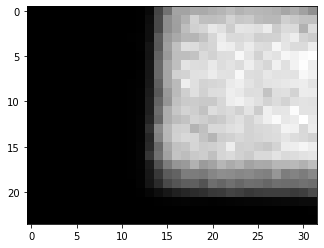

In [3]:
import torchvision.transforms as transforms
from lenslessclass.datasets import MNISTAugmented
import numpy as np
from lensless.plot import plot_image


dataset = "../data/MNIST_tape_down128_height0.12"

# centered
dataset = "../data/MNIST_tape_outdim3082560_height0.12_scene2mask0.4_poisson40.0_downpsf2.0_10files"

# -- SHIFT
# dataset = "../data/MNIST_tape_outdim3082560_height0.12_scene2mask0.4_poisson40.0_downpsf2.0_RandomShift_10files"
# dataset = "../data/MNIST_tape_outdim12330240_height0.12_scene2mask0.4_poisson40.0_downpsf2.0_RandomShift_10files"
dataset = "../data/MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomShift"


# -- PERSPECTIVE
dataset = "../data/MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomPerspective0.5"


# -- ROTATE
dataset = "data/MNIST_tape_outdim768_height0.12_scene2mask0.4_poisson40.0_downpsf8.0_RandomRotate90.0"

# -- RESCALE
dataset = "data/MNIST_tape_outdim768_height0.02-0.2_scene2mask0.4_poisson40.0_downpsf8.0"

idx = 1
gamma = 1

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
ds = MNISTAugmented(path=dataset, train=False, transform=trans)
input_image, label = ds[idx]
input_image_cpu = np.transpose(input_image.cpu().numpy(), (1, 2, 0)).squeeze()
plot_image(input_image_cpu, gamma=gamma, normalize=True);

Setup time : 0.7023568153381348 s
Processing time : 14.579695701599121 s


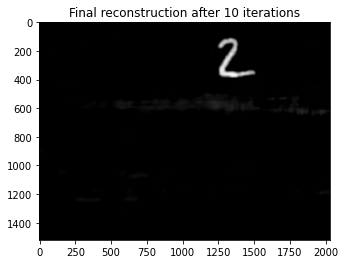

In [ ]:
import time
from lensless.io import load_data
from lensless import ADMM
from lensless.util import rgb2gray
from lensless.util import resize
import cv2


down = 2

psf = load_psf(fp=psf_fp)
psf = rgb2gray(psf)

psf = resize(psf, 1/ down, interpolation=cv2.INTER_CUBIC).astype(np.float32)
data = resize(input_image_cpu, 1/ down, interpolation=cv2.INTER_CUBIC).astype(np.float32)

start_time = time.time()
recon = ADMM(psf)
recon.set_data(data)
print(f"Setup time : {time.time() - start_time} s")

start_time = time.time()
res = recon.apply(n_iter=n_iter, disp_iter=disp, gamma=gamma, plot=True)
print(f"Processing time : {time.time() - start_time} s")

# visualize image transformation

In [333]:
from lenslessclass.datasets import MNISTPropagated
import numpy as np
from lensless.plot import plot_image


## - transformation param
object_height = 0.12
perspective = 0.5
random_shift = False
rotate = False    # 90 or False


## -- PSF
psf_fp = "../psfs/tape.png"
mask2sensor = 4e-3
crop_psf = False
down_psf = 8
single_psf = False


# psf_fp = "../psfs/lens.png"
# mask2sensor = 7.53e-3
# crop_psf = 100
# down_psf = 1
# single_psf = True

# psf_fp = "../psfs/simulated_mls63_mask2sensor0p0005_17052022_18h00_12bit.png"
# mask2sensor = 0.5e-3
# crop_psf = False
# down_psf = 8
# single_psf = False

psf_fp = "../psfs/adafruit.png"
# mask2sensor = 4e-3
crop_psf = False
down_psf = 8
single_psf = False

# psf_fp = "../psfs/simulated_adafruit_deadspaceTrue_15052022_21h04.png"
# mask2sensor = 4e-3
# crop_psf = False
# down_psf = 8
# single_psf = False


output_dim = (480, 640)
output_dim = (24, 32)

# # # # # down = 120
# down = 20
# output_dim = tuple((np.array([3040, 4056]) / down).astype(int))

noise_type = "poisson"
snr = 40

grayscale = True
scene2mask = 40e-2
device = "cpu"

ds = MNISTPropagated(
    psf_fp=psf_fp,
    downsample_psf=down_psf,
    output_dim=output_dim,
    scene2mask=scene2mask,
    mask2sensor=mask2sensor,
    sensor="rpi_hq",
    object_height=object_height,
    device=device,
    crop_psf=crop_psf,
    grayscale=grayscale,
    vflip=False,
    train=False,
    single_psf=single_psf,
    root="../data",
    noise_type=noise_type,
    snr=snr,
    random_shift=random_shift,
    rotate=rotate,
    perspective=perspective,
)


(24, 32)
255


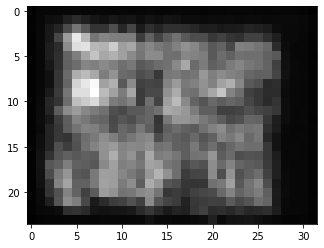

In [342]:
dataset_idx = 4

# plot simulated
img, label = ds[dataset_idx]
if grayscale:
    img_data = img.cpu().clone().numpy().squeeze()
else:
    img_data = img.cpu().clone().numpy().transpose(1, 2, 0)
print(img_data.shape)
plot_image(img_data);
print(img_data.max())

(24, 32)
Setup time : 0.0014600753784179688 s
Processing time : 0.054358482360839844 s


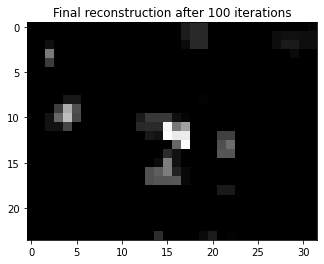

In [343]:
from lensless.io import load_psf
from lensless.util import rgb2gray
import time
from lensless import ADMM

# -- prepare data
psf = load_psf(fp=psf_fp, shape=img_data.shape)
if grayscale:
    psf = rgb2gray(psf)
print(psf.shape)

img_data_norm = img_data / img_data.max()

# -- apply ADMM
n_iter = 100
disp = n_iter + 1
gamma = 1

start_time = time.time()
recon = ADMM(psf)
recon.set_data(img_data)
print(f"Setup time : {time.time() - start_time} s")

start_time = time.time()
res = recon.apply(n_iter=n_iter, disp_iter=disp, gamma=gamma, plot=True)
print(f"Processing time : {time.time() - start_time} s")